### Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Data Exploration

In [4]:
df.shape

(14999, 10)

In [5]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

<AxesSubplot:xlabel='left', ylabel='count'>

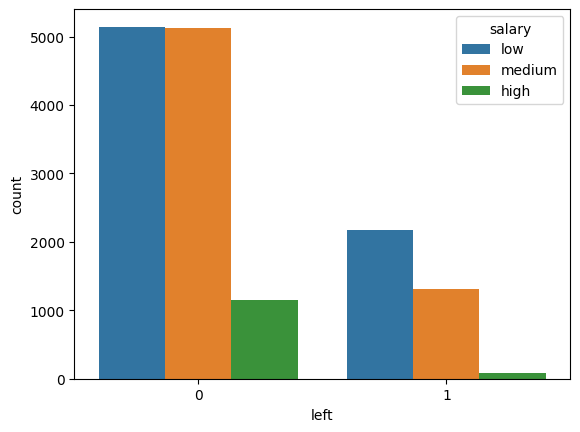

In [6]:
sns.countplot(x='left',hue='salary',data=df)

Plot bar charts showing impact of employee salaries on retention

<AxesSubplot:xlabel='salary', ylabel='count'>

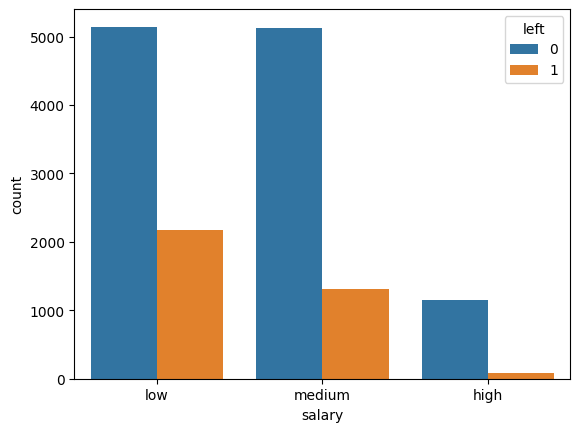

In [7]:
sns.countplot(x='salary',hue='left',data=df)

([<matplotlib.patches.Wedge at 0x1ba5a283790>,
 [Text(-0.8063869332849134, 0.7481578134507135, 'No'),
  Text(0.8796948745185899, -0.816172118946563, 'Yes')],
 [Text(-0.43984741815540723, 0.4080860800640255, '76.2%'),
  Text(0.5131553434691773, -0.47610040271882836, '23.8%')])

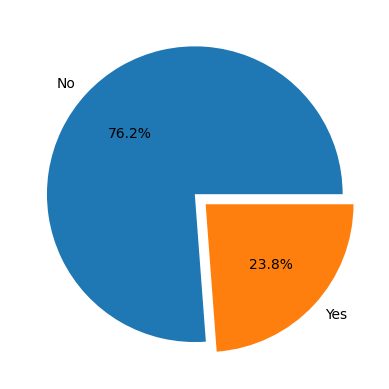

In [16]:
plt.pie(df.left.value_counts(),labels=['No','Yes'],autopct='%1.1f%%',explode=[0,0.1])

Plot bar charts showing corelation between department and employee retention

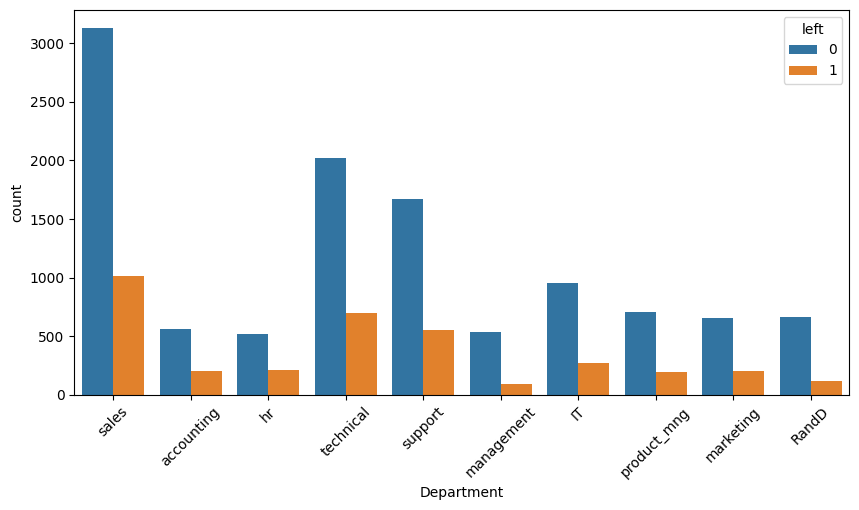

In [9]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Department',hue='left',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

#### From the data analysis so far we can conclude that we will use following variables as independant variables in our model.
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

In [36]:
df1 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Take Salary dummies

In [37]:
dummies = pd.get_dummies(df1['salary'])
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [38]:
df1_with_dummies = pd.concat([df1,dummies],axis=1)
df1_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [39]:
#Drop the salary column
df1_with_dummies.drop('salary',axis=1,inplace=True)

In [40]:
df1_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [55]:
df1_with_dummies.drop('high',axis=1,inplace=True)

In [56]:
df1_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [57]:
X = df1_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [58]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [61]:
X_train.shape

(11999, 5)

In [62]:
X_test.shape

(3000, 5)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train,y_train)

LogisticRegression()

In [66]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [67]:
y_test

12043    1
13641    0
12034    1
13901    0
12331    1
        ..
11183    0
9427     0
7415     0
2499     0
377      1
Name: left, Length: 3000, dtype: int64

In [68]:
model.score(X_test,y_test)

0.7713333333333333

In [69]:
model.score(X_train,y_train)

0.7770647553962831